# Jeb!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df = pd.read_csv('cleaning.csv')

In [3]:
df.head(100)

,Unnamed: 0,title,text,date,is_true,domestic
0,0,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,2015-03-31,0,1
1,1,FLASHBACK: KING OBAMA COMMUTES SENTENCES OF 22...,Just making room for Hillary President Obama t...,2015-03-31,0,1
2,2,APPLE’S CEO SAYS RELIGIOUS FREEDOM LAWS ARE ‘D...,The gay mafia has a new corporate Don. This i...,2015-03-31,0,1
3,3,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",2015-03-31,0,1
4,4,OH NO! GUESS WHO FUNDED THE SHRINE TO TED KENNEDY,Nothing like political cronyism to make your s...,2015-03-31,0,1
...,...,...,...,...,...,...
95,201,ELEMENTARY SCHOOL PLANS ‘BLACKS ONLY’ FIELD TR...,Because there wouldn t be any outrage over a ...,2015-04-17,0,1
96,202,ONLY 25% OF DOWN SYNDROME BABIES ARE ALLOWED T...,Alan noticed his son liked to lay on his belly...,2015-04-17,0,1
97,203,WHY CHRISTIANS ARE ASKING THEIR FELLOW CHRISTI...,"It s about time Rev. Patrick Mahoney, of Churc...",2015-04-18,0,1
98,205,WATCH WHAT HAPPENS WHEN COLLEGE STUDENTS ARE A...,Listen to the mind boggling answers to these q...,2015-04-19,0,1


In [4]:
df[df['is_true'] == 0]['text'].str.contains('liberal').sum()

1484

In [5]:
df[df['is_true'] == 1]['text'].str.contains('liberal').sum()

640

In [6]:
df[df['is_true'] == 0]['text'].str.contains('Rolling Stones').sum()

8

In [7]:
df[df['is_true'] == 1]['text'].str.contains('Rolling Stones').sum()

5

In [8]:
df[df['is_true'] == 0]['text'].str.contains('Fox').sum()

1725

In [9]:
df[df['is_true'] == 1]['text'].str.contains('Fox').sum()

596

In [10]:
df.text.replace({'\d+': ''}, regex=True, inplace=True)

In [11]:
df[df['is_true'] == 0]['text'].str.contains('testimony').sum()

359

In [12]:
df[df['is_true'] == 1]['text'].str.contains('testimony').sum()

325

In [13]:
df[df['is_true'] == 0]['text'].str.contains('CNN').sum()

1741

In [14]:
df[df['is_true'] == 1]['text'].str.contains('CNN').sum()

617

In [15]:
df[df['is_true'] == 0]['text'].str.contains('fake').sum()

1027

In [16]:
df[df['is_true'] == 1]['text'].str.contains('fake').sum()

237

In [18]:
df['word_count_fake'] = df[df['is_true'] == 0]['text'].apply(lambda x: len(x.split()))

In [19]:
df['word_count_true'] = df[df['is_true'] == 1]['text'].apply(lambda x: len(x.split()))

In [20]:
df.head()

,Unnamed: 0,title,text,date,is_true,domestic,word_count_fake,word_count_true
0,0,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,2015-03-31,0,1,321.0,NaN
1,1,FLASHBACK: KING OBAMA COMMUTES SENTENCES OF 22...,Just making room for Hillary President Obama t...,2015-03-31,0,1,1120.0,NaN
2,2,APPLE’S CEO SAYS RELIGIOUS FREEDOM LAWS ARE ‘D...,The gay mafia has a new corporate Don. This i...,2015-03-31,0,1,210.0,NaN
3,3,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",2015-03-31,0,1,122.0,NaN
4,4,OH NO! GUESS WHO FUNDED THE SHRINE TO TED KENNEDY,Nothing like political cronyism to make your s...,2015-03-31,0,1,416.0,NaN


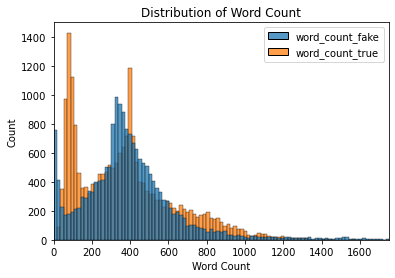

In [21]:
plt.title('Distribution of Word Count')
plt.xlabel('Word Count')
plt.xlim(0,1750)
sns.histplot(df[['word_count_fake','word_count_true']]);

In [22]:
df.word_count_fake.describe()

count    18647.000000
mean       428.194830
std        413.478175
min          0.000000
25%        259.000000
50%        370.000000
75%        502.000000
max       8099.000000
Name: word_count_fake, dtype: float64

In [23]:
df.word_count_true.describe()

count    21211.000000
mean       382.414360
std        272.293077
min          0.000000
25%        146.000000
50%        356.000000
75%        520.000000
max       5140.000000
Name: word_count_true, dtype: float64

In [24]:
df.drop(columns = ['word_count_fake', 'word_count_true'], inplace = True)

In [37]:
df.text.replace({'___': ''}, regex=True, inplace=True)
df.text.replace({'_______': ''}, regex=True, inplace=True)
df.text.replace({'_________________________': ''}, regex=True, inplace=True)
df.text.replace({'__________________________': ''}, regex=True, inplace=True)
df.text.replace({'_____________________________________________________________________________________': ''}, regex=True, inplace=True)






In [38]:
cvec = CountVectorizer(stop_words='english')
cvec.fit(df['text'])

vec_df = pd.DataFrame(cvec.transform(df['text']).todense(),
                      columns = cvec.get_feature_names())

In [39]:
vec_df.head()

,__,__mref,__saada,_a_w_w_r_,_ad_container,_all_,_americasidiot,_anyone_,_bigger_,_brendancarroll,...,zzpx_bzkapolice,zzqvykxif,zzsgpbf,zztaine,zzucqevtm,zzumlhkoc,zzzzaaaacccchhh,zzzzzzzz,zzzzzzzzzzzzz,émigré
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
df.loc[df['text'].str.contains('émigré'),'text']

35477    WASHINGTON (Reuters) - Jared Kushner’s lawyer ...
Name: text, dtype: object